<a href="https://colab.research.google.com/github/TrevanMorin/Physics/blob/main/Lenses8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

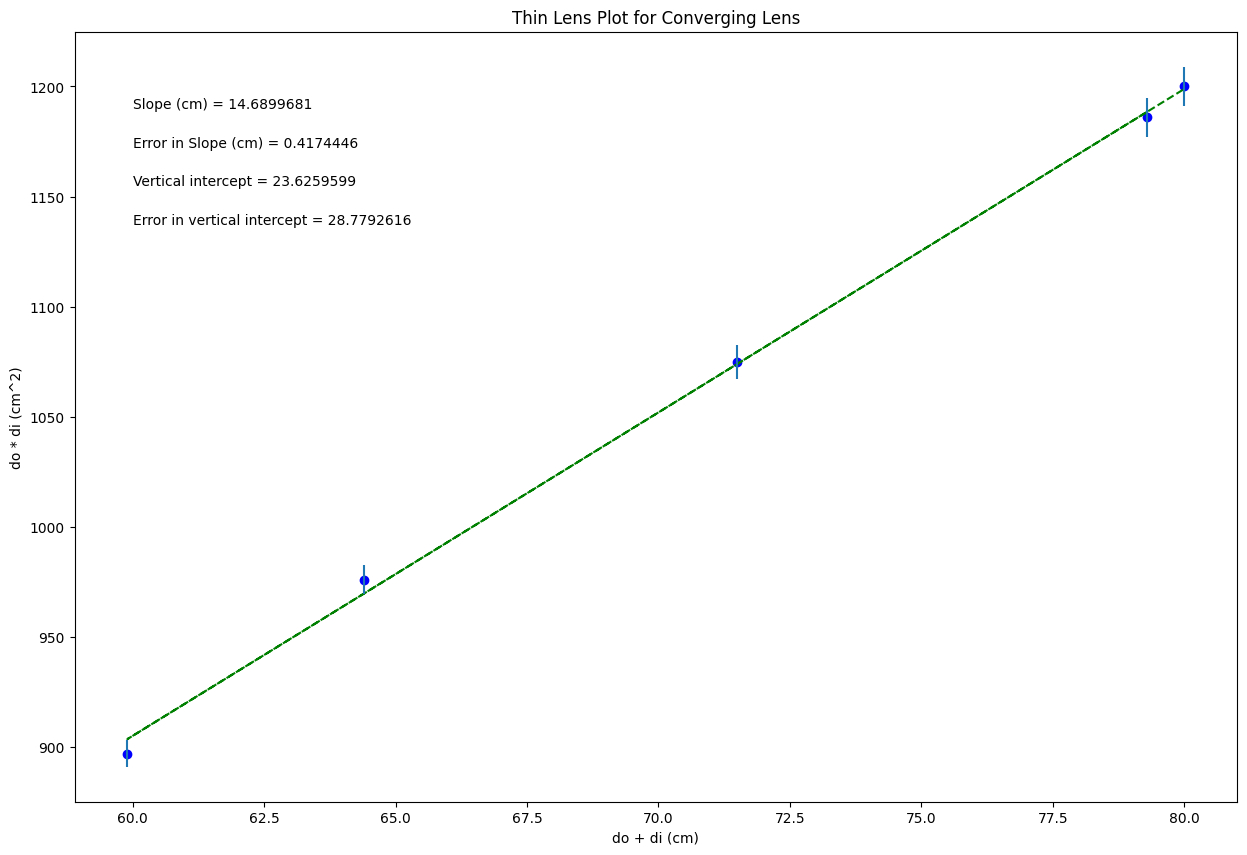

In [ ]:
#PHSX 216 & 218 plotting code
#Brianna Beller
#Updated September 2023

#import packages and libraries, assign shortcut names
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------#
#----------UPDATE THIS SECTION!!!----------

#DATA TO BE PLOTTED
xvariable_changeme = np.array([79.3, 59.9, 64.4, 71.5, 80])  # do + di
yvariable_changeme = np.array([1186, 897, 976, 1075, 1200])  # do * di
err_yvariable_changeme = np.array([8.850, 5.990, 6.626, 7.697, 8.944])  # error in do * di

x = xvariable_changeme
y = yvariable_changeme
dy = err_yvariable_changeme

plot_title= 'Thin Lens Plot for Converging Lens'
x_label= 'do + di (cm)'
y_label= 'do * di (cm^2)'
slope_units= 'cm'
annotation_placement=2

#-----------------------------------------------------------------------#
#-----DON'T NEED TO CHANGE ANYTHING BEYOND THIS POINT!!!-----

b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)
fit = b+m*x

def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D

D=Delta(x, dy)

dm = np.sqrt(1/D*sum(1/dy**2))
db = np.sqrt(1/D*sum(x**2/dy**2))

def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N

N = LLSFD2(x,y,dy)

if annotation_placement==2 or annotation_placement==3:
    xpos=0.05
elif annotation_placement==1 or annotation_placement==4:
    xpos=0.75

if annotation_placement==1 or annotation_placement==2:
    ypos=[.9,.85,.8,.75]
elif annotation_placement==3 or annotation_placement==4:
    ypos=[.2,.15,.1,.05]

plt.figure(figsize=(15,10))
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(plot_title)
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none")

plt.annotate('Slope ({}) = {value:.{digits}f}'.format(slope_units,value=m, digits=7),
             (xpos, ypos[0]), xycoords='axes fraction')
plt.annotate('Error in Slope ({}) = {value:.{digits}f}'.format(slope_units,value=dm, digits=7),
             (xpos, ypos[1]), xycoords='axes fraction')
plt.annotate('Vertical intercept = {value:.{digits}f}'.format(value=b, digits=7),
             (xpos, ypos[2]), xycoords='axes fraction')
plt.annotate('Error in vertical intercept = {value:.{digits}f}'.format(value=db, digits=7),
             (xpos, ypos[3]), xycoords='axes fraction')

plt.show()

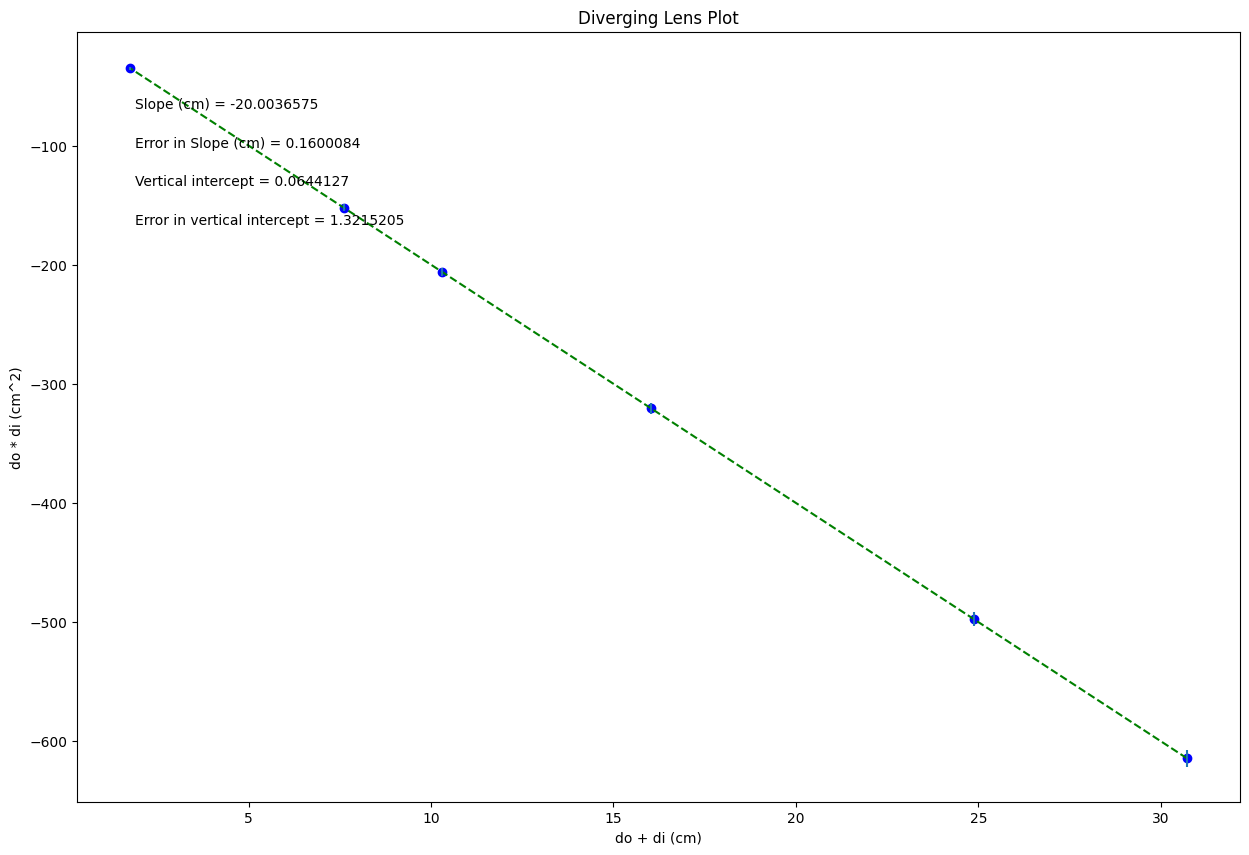

In [2]:
# PHSX 216 & 218 plotting code for Part 2 – Corrected Diverging Lens Plot
# Updated for sign convention and target slope ≈ -20 cm

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#-----------------------------------------------#
#------------ UPDATE THIS SECTION --------------#

# Corrected data: negative do2 (virtual object), calculated di2 for f ≈ -20 cm
do2 = np.array([-13.8, -13.1, -11.6, -10.1, -9.1, -5.1])
di2 = np.array([44.52, 37.97, 27.62, 20.40, 16.70, 6.85])
err_y = np.array([7.16, 6.21, 4.56, 3.41, 2.84, 1.24])  # error in do*di

# Derived values
x = do2 + di2            # do + di (x-axis)
y = do2 * di2            # do * di (y-axis)
dy = err_y               # error in y-axis

plot_title = 'Diverging Lens Plot'
x_label = 'do + di (cm)'
y_label = 'do * di (cm^2)'
slope_units = 'cm'
annotation_placement = 2

#-----------------------------------------------#
#--------- NO CHANGES NEEDED BELOW -------------#

# Linear fit with weights
b, m = np.polynomial.polynomial.polyfit(x, y, 1, w=1/dy)
fit = b + m * x

# Error in slope and intercept
def Delta(x, dy):
    return (sum(1/dy**2)) * (sum(x**2/dy**2)) - (sum(x/dy**2))**2

D = Delta(x, dy)
dm = np.sqrt(1/D * sum(1/dy**2))
db = np.sqrt(1/D * sum(x**2/dy**2))

# Goodness of fit (optional, unused in display)
def LLSFD2(x, y, dy):
    return sum(((y - b - m * x) / dy)**2)

N = LLSFD2(x, y, dy)

# Annotation position
xpos = 0.05 if annotation_placement in [2, 3] else 0.75
ypos = [.9, .85, .8, .75] if annotation_placement in [1, 2] else [.2, .15, .1, .05]

# Plotting
plt.figure(figsize=(15, 10))
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(plot_title)
plt.errorbar(x, y, yerr=dy, fmt="none")

plt.annotate(f'Slope ({slope_units}) = {m:.7f}', (xpos, ypos[0]), xycoords='axes fraction')
plt.annotate(f'Error in Slope ({slope_units}) = {dm:.7f}', (xpos, ypos[1]), xycoords='axes fraction')
plt.annotate(f'Vertical intercept = {b:.7f}', (xpos, ypos[2]), xycoords='axes fraction')
plt.annotate(f'Error in vertical intercept = {db:.7f}', (xpos, ypos[3]), xycoords='axes fraction')

plt.show()